# 🤖 AI, CA3, Machine Learning 📚  

* **Name** : Amirmortaza 🖊  
* **Last Name** : Rezaee 📝  
* **SID** : 810003004 🆔

## 🧹 Data Preprocessing  
Implement all your preprocessing in this section, following the guidelines provided in the project documentation 📄.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier


### 📥 Load Dataset  
In this subsection, you should load the dataset as a pandas dataframe 🐼.

In [2]:
df = pd.read_csv('hotels_in_europe.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7322 entries, 0 to 7321
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7322 non-null   object 
 1   location              7322 non-null   object 
 2   price                 7322 non-null   object 
 3   rating                7129 non-null   float64
 4   quality               7169 non-null   object 
 5   review                7169 non-null   object 
 6   bed                   7299 non-null   object 
 7   size                  2454 non-null   object 
 8   distance_from_center  7322 non-null   float64
 9   room_type             7322 non-null   object 
 10  nights                7322 non-null   object 
 11  adults                7322 non-null   object 
 12  free_cancellation     583 non-null    object 
dtypes: float64(2), object(11)
memory usage: 743.8+ KB


,rating,distance_from_center
count,7129.000000,7322.000000
mean,7.742783,24.699399
std,1.128965,82.440210
min,1.000000,0.500000
25%,7.300000,2.200000
50%,8.000000,3.700000
75%,8.400000,5.800000
max,10.000000,500.000000


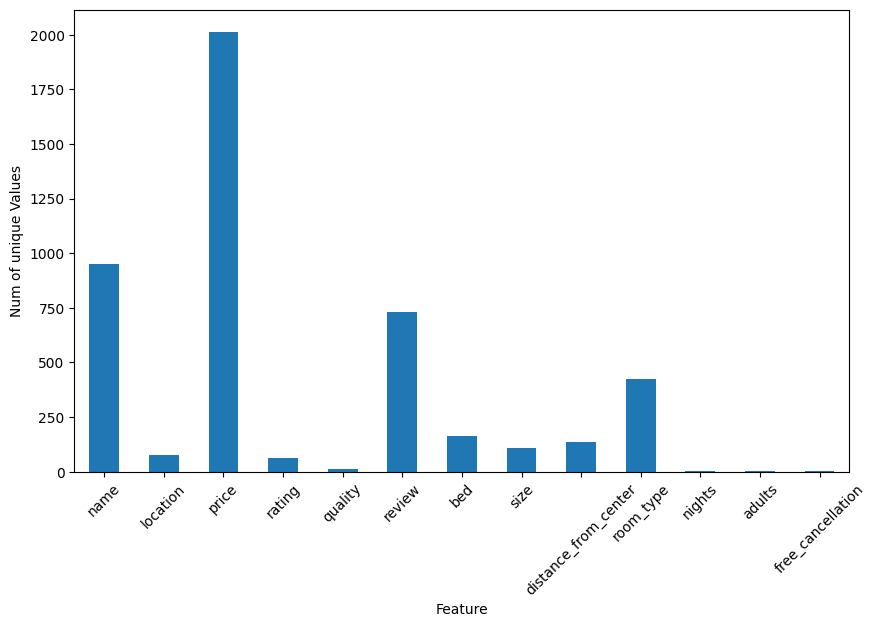

In [3]:
#plotting the num of unique vals of each feature:
unique_values = df.nunique()
unique_values.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Feature')
plt.ylabel('Num of unique Values')
plt.xticks(rotation=45)
plt.show()

distance_Q1 = df['distance_from_center'].quantile(0.25)
distance_Q2 = df['distance_from_center'].quantile(0.5)
distance_Q3 = df['distance_from_center'].quantile(0.75)

### ➕ Additional Columns  
In this subsection, you should add some additional columns to the dataframe, according to the project documentation 📄.

In [4]:
def assign_value(x):
    if x <= distance_Q1:
        return 1
    elif distance_Q1 < x <= distance_Q2:
        return 2
    elif distance_Q2 < x <= distance_Q3:
        return 3
    else:
        return 4

In [5]:
df['city'] = df['location'].str.split(',').str[-1].str.strip()

df['Numeric_Price'] = df['price'].str.replace(r'[^\d,]', '', regex=True)
df['Numeric_Price'] = df['Numeric_Price'].str.replace(',', '').astype(float)

df['adults_count'] = df['adults'].str.extract(r'(\d+)').astype(int)
 
df['nights_count'] = df['nights'].str.extract(r'(\d+)').astype(int)

df['reviews_count'] = df['review'].str.replace(r'[^\d]', '', regex=True)

df['distance'] = df['distance_from_center'].apply(assign_value)


### 🧩 Manipulate Columns 🔢  
In this subsection, you should extract numerical values from columns and also convert categorical data to numerical values,as described in the project documentation 📄.

In [6]:
#deleting some columns
df.drop(columns=['name'], inplace=True)
df.drop(columns=['quality'], inplace=True)
df.drop(columns=['size'], inplace=True)
df.drop(columns=['bed'], inplace=True)

#assigning values to non-numeric datas
label_encoder = LabelEncoder()
df['city_numeric'] = label_encoder.fit_transform(df['city'])

df['room_type_numeric'] = label_encoder.fit_transform(df['room_type'])

cancelation_map = {'Free cancellation': 1}
df['free_cancellation_numeric'] = df['free_cancellation'].map(cancelation_map).fillna(0)


### 🛠 Handling Missing Values 💡
In this subsection, you are supposed to handle null and missing values, following regular techinuques, used in this context

In [7]:
df['reviews_count'] = df['reviews_count'].fillna(0)
df['reviews_count'] = df['reviews_count'].astype(int)

df['rating'] = df['rating'].fillna(df['rating'].median())

### 🏷 Assigning Labels  
In this subsection, we want to assign labels to hotels 🏨, according to their price 💰.  
We have two labels:  
- **0** for hotels with a price less than a threshold 🟢.  
- **1** for those with higher prices 🔴.  

To determine the threshold, we use the median of prices 📊.  
In the first step, complete the following function. Then, you should use the `apply` method of pandas 🐼 to assign labels to each hotel.

In [8]:
def assign_label(x):
    the_median = df['Numeric_Price'].median()
    if x >= the_median:
        return 1
    else:
        return 0

df['price_Label'] = df['Numeric_Price'].apply(assign_label)

## 📊 Data Visualization  
Research and explore various data visualization techniques 🔍 to identify the best options for your project 🎯. Different approaches may be suitable for different aspects of your data 📈.

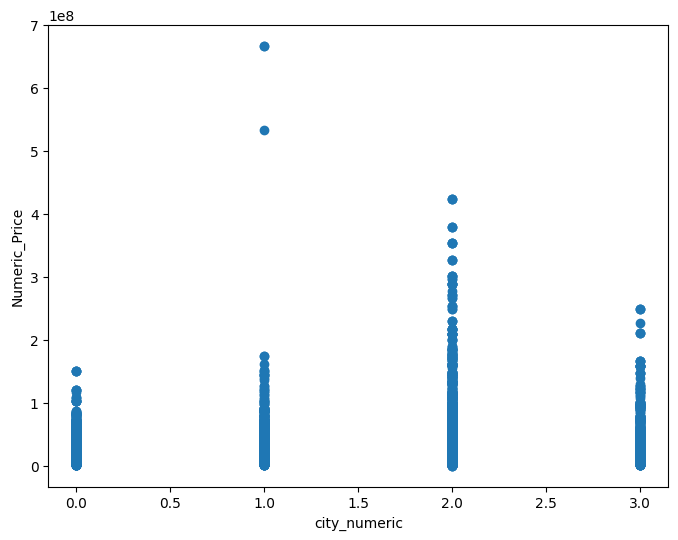

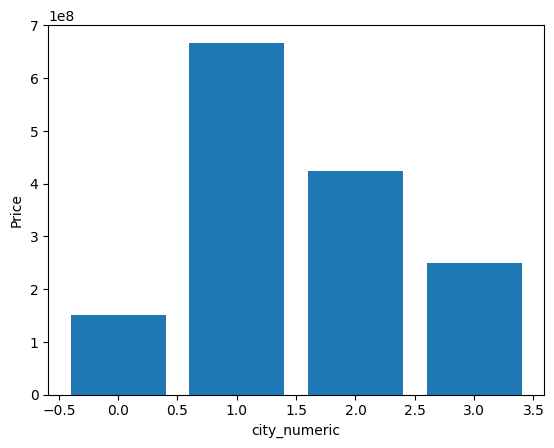

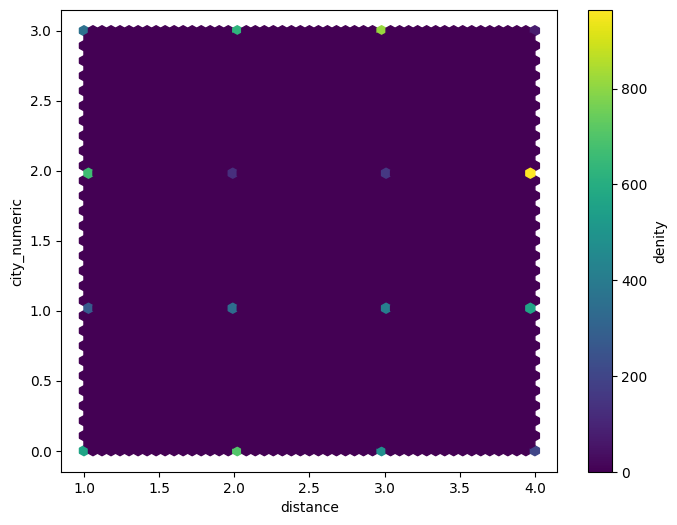

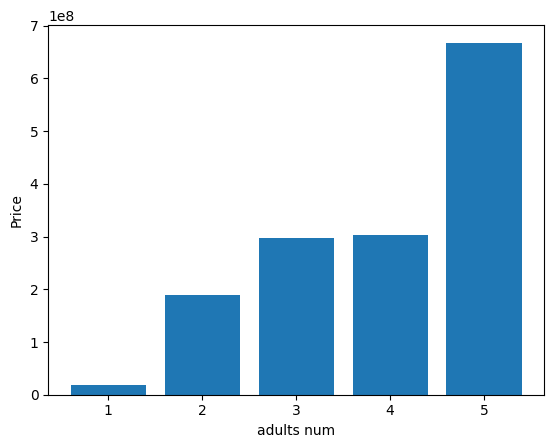

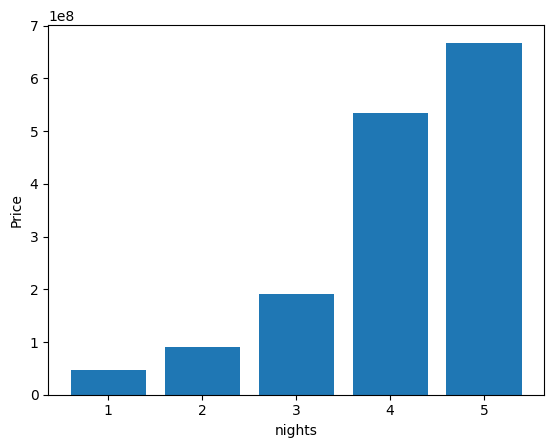

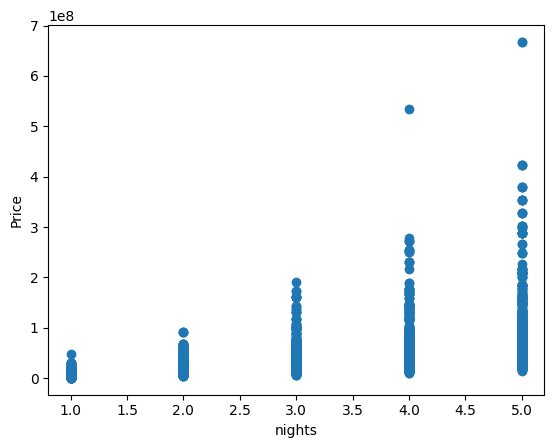

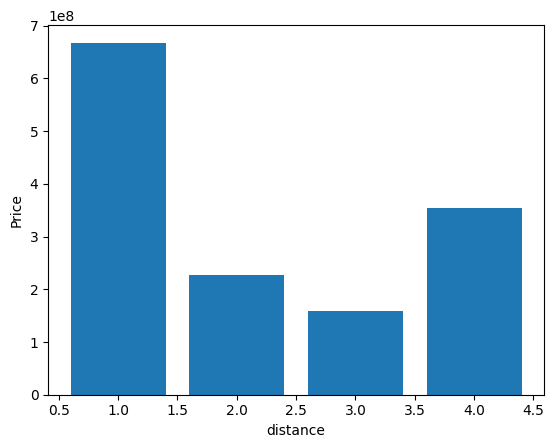

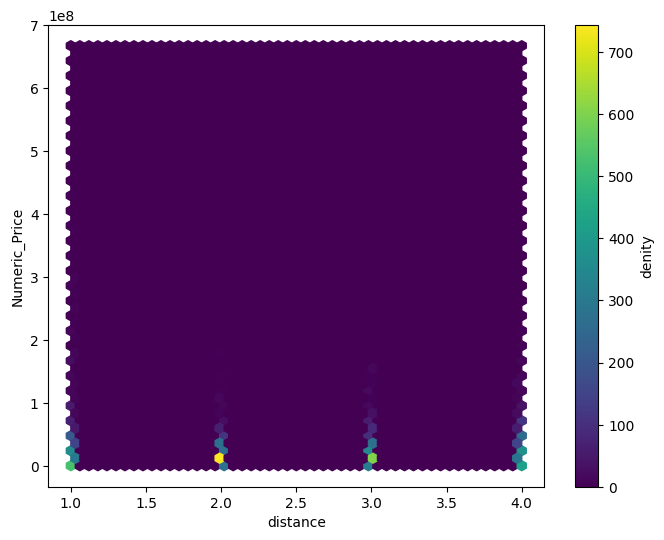

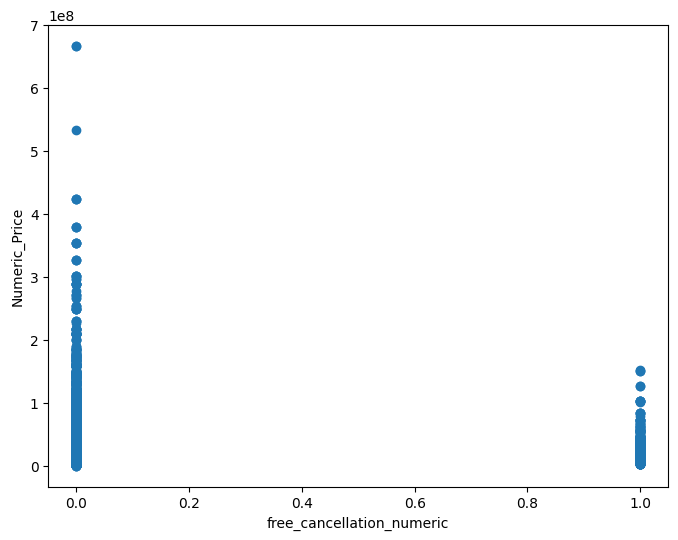

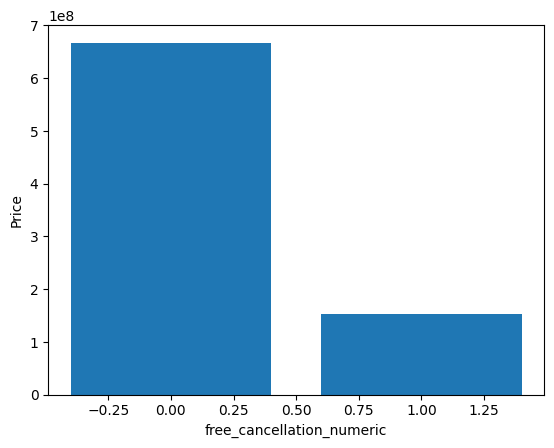

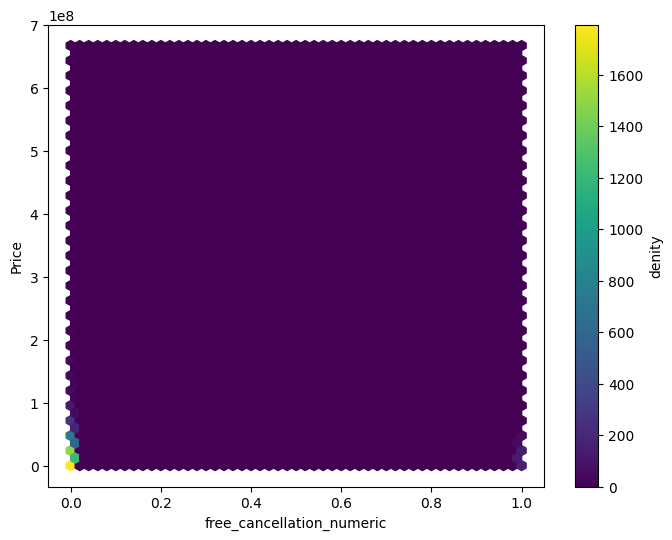

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(df['city_numeric'], df['Numeric_Price'])
plt.xlabel('city_numeric')
plt.ylabel('Numeric_Price')
plt.show()

plt.bar(df['city_numeric'], df['Numeric_Price'])
plt.xlabel('city_numeric')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(8, 6))
plt.hexbin(df['distance'], df['city_numeric'], gridsize=50, cmap='viridis')
plt.colorbar(label ='denity')
plt.xlabel('distance')
plt.ylabel('city_numeric')
plt.show()

plt.bar(df['adults_count'], df['Numeric_Price'])
plt.xlabel('adults num')
plt.ylabel('Price')
plt.show()

plt.bar(df['nights_count'], df['Numeric_Price'])
plt.xlabel('nights')
plt.ylabel('Price')
plt.show()

plt.scatter(df['nights_count'], df['Numeric_Price'])
plt.xlabel('nights')
plt.ylabel('Price')
plt.show()


plt.bar(df['distance'], df['Numeric_Price'])
plt.xlabel('distance')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(8, 6))
plt.hexbin(df['distance'], df['Numeric_Price'], gridsize=50, cmap='viridis')
plt.colorbar(label ='denity')
plt.xlabel('distance')
plt.ylabel('Numeric_Price')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['free_cancellation_numeric'], df['Numeric_Price'])
plt.xlabel('free_cancellation_numeric')
plt.ylabel('Numeric_Price')
plt.show()

plt.bar(df['free_cancellation_numeric'], df['Numeric_Price'])
plt.xlabel('free_cancellation_numeric')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(8, 6))
plt.hexbin(df['free_cancellation_numeric'], df['Numeric_Price'], gridsize=50, cmap='viridis')
plt.colorbar(label ='denity')
plt.xlabel('free_cancellation_numeric')
plt.ylabel('Price')
plt.show()

## 🏷 Classification  
In this section, we will go through the classification pipeline. We will deploy several machine learning models to classify hotels based on their price 💵. Finally, you will implement a boosting algorithm from scratch 🛠 and compare its performance with the library implementation 📚.

### 🔀 Train-Test Split  
You should divide the data into a training set and a test set. Use 20% of the data for testing and 80% for training 📊.

In [10]:
#features & goals
X = df[['city_numeric', 'rating', 'reviews_count', 'distance', 'room_type_numeric', 'nights_count', 'adults_count', 'free_cancellation_numeric']]  #features
y = df['price_Label']  #goal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 🌐 Normalization  
One of the most important steps in the classification pipeline is normalization. You will be asked about the importance of this step ⚙️.

In [11]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
# Convert back to DataFrame
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X_test.columns)

### 🚀 Deploying Sklearn Models  
In this subsection, you should use built-in models from the sklearn library for the classification task. Don't forget to show the complete classification report, including the confusion matrix, precision, recall, F1-score, and accuracy 📊. You will be asked about these metrics 📈.

#### 📉 Gaussian Naive Bayes

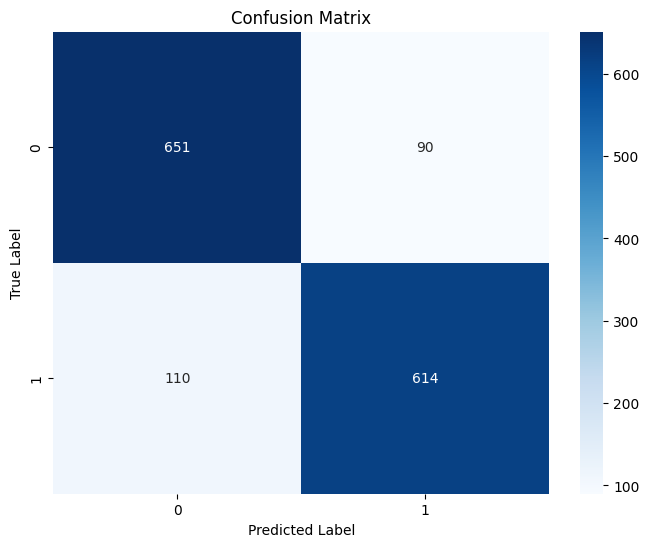

Recall: 84.8066%

Precision: 87.2159%

F1-Score: 0.8599

Accuracy: 86.35%

Precision (micro): 0.8635
Precision (macro): 0.8638
Precision (weighted): 0.8637

Recall (micro): 0.8635
Recall (macro): 0.8633
Recall (weighted): 0.8635

F1-Score (micro): 0.8635
F1-Score (macro): 0.8634
F1-Score (weighted): 0.8634



In [12]:
modelNB = GaussianNB()
modelNB.fit(X_train_normalized, y_train)
y_pred_GNB = modelNB.predict(X_test_normalized)

    #TESTING
#CONFUSION MATRIX
cm_GNB = confusion_matrix(y_test, y_pred_GNB)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_GNB, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#RECALL
recall_GNB = recall_score(y_test, y_pred_GNB)
print(f"Recall: {recall_GNB * 100:.4f}%\n")

#PRECISION
precision_GNB = precision_score(y_test, y_pred_GNB)
print(f"Precision: {precision_GNB * 100:.4f}%\n")

#F1-Score
f1_GNB = f1_score(y_test, y_pred_GNB)
print(f"F1-Score: {f1_GNB:.4f}\n")

#ACCURACY
accuracy_GNB = accuracy_score(y_test, y_pred_GNB)
print(f"Accuracy: {accuracy_GNB * 100:.2f}%\n")

precision_micro_GNB = precision_score(y_test, y_pred_GNB, average='micro')
precision_macro_GNB = precision_score(y_test, y_pred_GNB, average='macro')
precision_weighted_GNB = precision_score(y_test, y_pred_GNB, average='weighted')

recall_micro_GNB = recall_score(y_test, y_pred_GNB, average='micro')
recall_macro_GNB = recall_score(y_test, y_pred_GNB, average='macro')
recall_weighted_GNB = recall_score(y_test, y_pred_GNB, average='weighted')

f1_micro_GNB = f1_score(y_test, y_pred_GNB, average='micro')
f1_macro_GNB = f1_score(y_test, y_pred_GNB, average='macro')
f1_weighted_GNB = f1_score(y_test, y_pred_GNB, average='weighted')

print(f"Precision (micro): {precision_micro_GNB:.4f}")
print(f"Precision (macro): {precision_macro_GNB:.4f}")
print(f"Precision (weighted): {precision_weighted_GNB:.4f}\n")

print(f"Recall (micro): {recall_micro_GNB:.4f}")
print(f"Recall (macro): {recall_macro_GNB:.4f}")
print(f"Recall (weighted): {recall_weighted_GNB:.4f}\n")

print(f"F1-Score (micro): {f1_micro_GNB:.4f}")
print(f"F1-Score (macro): {f1_macro_GNB:.4f}")
print(f"F1-Score (weighted): {f1_weighted_GNB:.4f}\n")

#### 🌳 Decision Tree Classifier

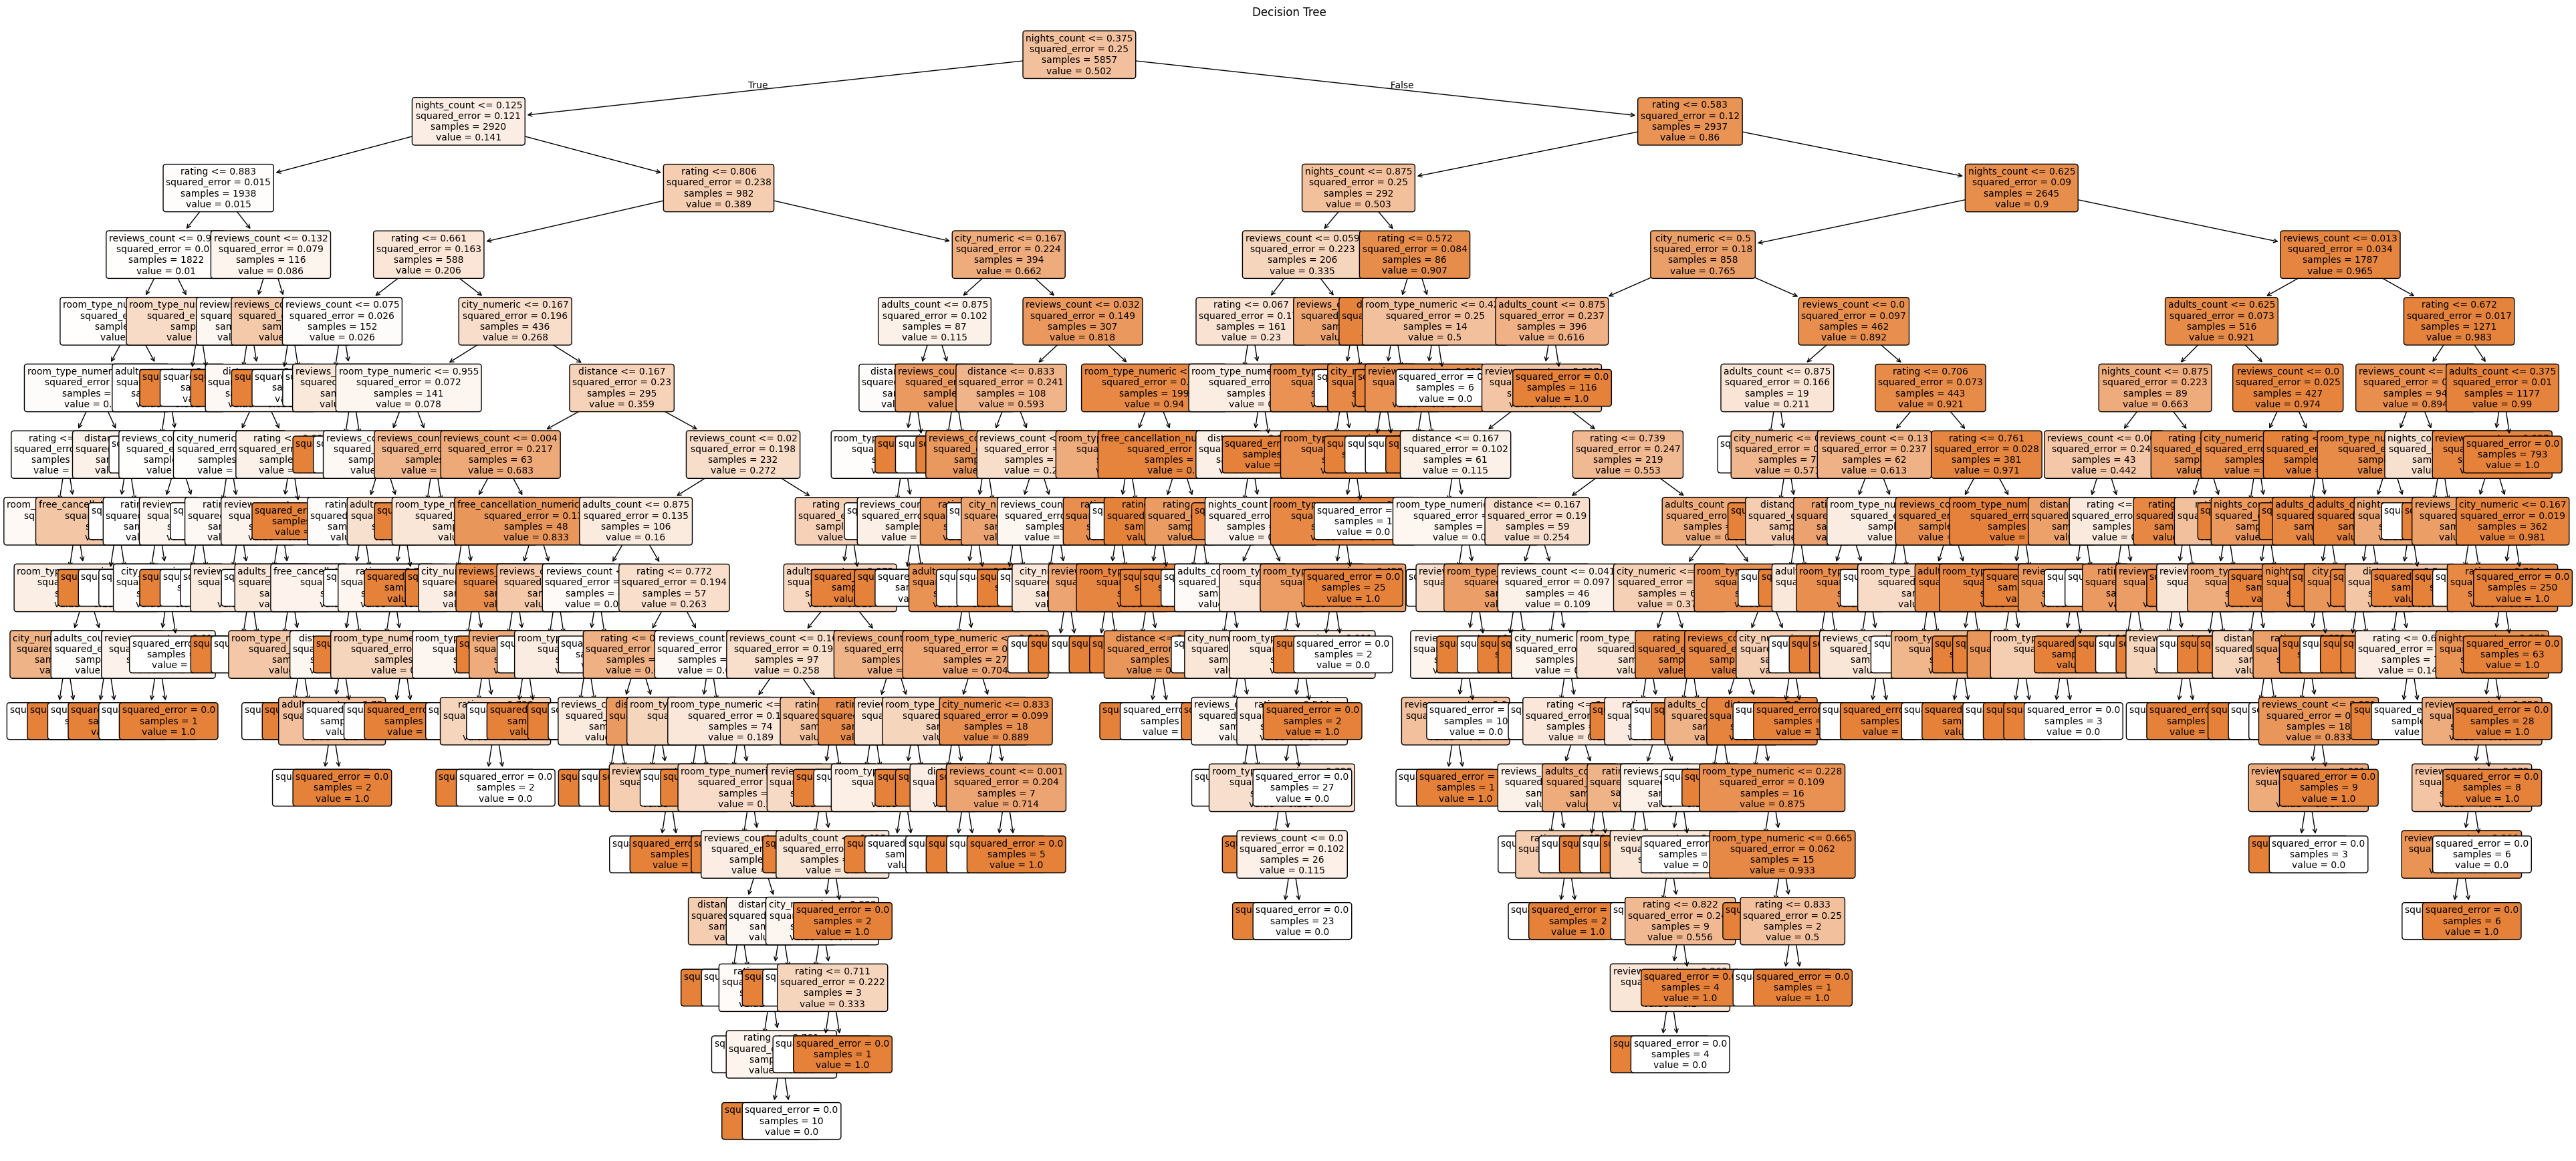

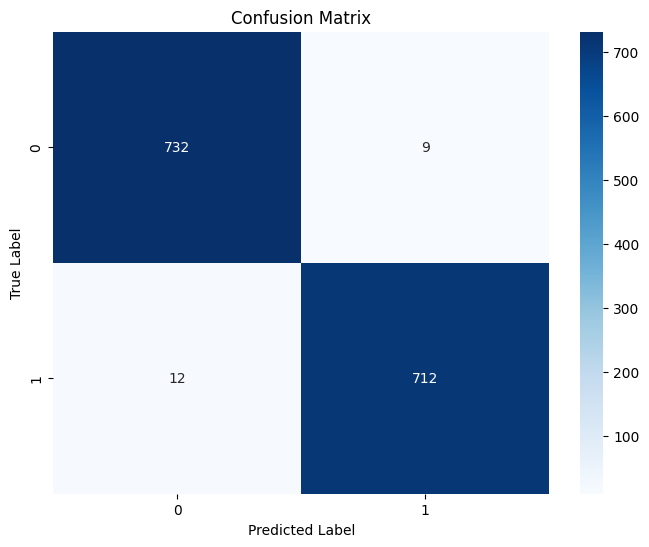

Recall: 98.3425%

Precision: 98.7517%

F1-Score: 0.9855

Accuracy: 98.57%

Precision (micro): 0.9857
Precision (macro): 0.9857
Precision (weighted): 0.9857

Recall (micro): 0.9857
Recall (macro): 0.9856
Recall (weighted): 0.9857

F1-Score (micro): 0.9857
F1-Score (macro): 0.9857
F1-Score (weighted): 0.9857



In [13]:
modelDT = DecisionTreeRegressor( random_state=42) #Apply Pruning -> MAX DEPTH=3 ! -> CANT DRAW CONFUSION MATRIX!
modelDT.fit(X_train_normalized, y_train)
y_pred_DT = modelDT.predict(X_test_normalized)

#Plotting the pruned tree
plt.figure(figsize=(48, 22))
plot_tree(modelDT, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.title("Decision Tree")
plt.show()

    #TESTING
#CONFUSION MATRIX
cm_DT = confusion_matrix(y_test, y_pred_DT)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_DT, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#RECALL
recall_DT = recall_score(y_test, y_pred_DT)
print(f"Recall: {recall_DT * 100:.4f}%\n")

#PRECISION
precision_DT = precision_score(y_test, y_pred_DT)
print(f"Precision: {precision_DT * 100:.4f}%\n")

#F1-Score
f1_DT = f1_score(y_test, y_pred_DT)
print(f"F1-Score: {f1_DT:.4f}\n")

#ACCURACY
accuracy_DT = accuracy_score(y_test, y_pred_DT)
print(f"Accuracy: {accuracy_DT * 100:.2f}%\n")

precision_micro_DT = precision_score(y_test, y_pred_DT, average='micro')
precision_macro_DT = precision_score(y_test, y_pred_DT, average='macro')
precision_weighted_DT = precision_score(y_test, y_pred_DT, average='weighted')

recall_micro_DT = recall_score(y_test, y_pred_DT, average='micro')
recall_macro_DT = recall_score(y_test, y_pred_DT, average='macro')
recall_weighted_DT = recall_score(y_test, y_pred_DT, average='weighted')

f1_micro_DT = f1_score(y_test, y_pred_DT, average='micro')
f1_macro_DT = f1_score(y_test, y_pred_DT, average='macro')
f1_weighted_DT = f1_score(y_test, y_pred_DT, average='weighted')

print(f"Precision (micro): {precision_micro_DT:.4f}")
print(f"Precision (macro): {precision_macro_DT:.4f}")
print(f"Precision (weighted): {precision_weighted_DT:.4f}\n")

print(f"Recall (micro): {recall_micro_DT:.4f}")
print(f"Recall (macro): {recall_macro_DT:.4f}")
print(f"Recall (weighted): {recall_weighted_DT:.4f}\n")

print(f"F1-Score (micro): {f1_micro_DT:.4f}")
print(f"F1-Score (macro): {f1_macro_DT:.4f}")
print(f"F1-Score (weighted): {f1_weighted_DT:.4f}\n")

#### 🌲🌳 Random Forest Classifier 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
195 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
118 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Us

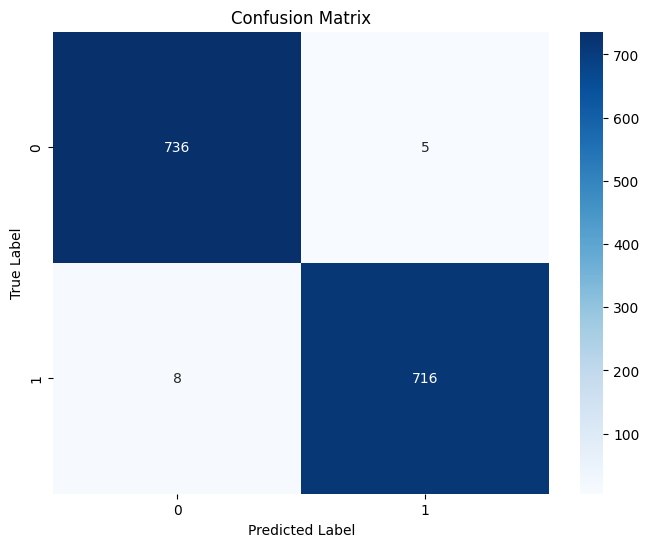

Recall: 98.8950%

Precision: 99.3065%

F1-Score: 0.9910

Accuracy: 99.11%

Precision (micro): 0.9911
Precision (macro): 0.9912
Precision (weighted): 0.9911

Recall (micro): 0.9911
Recall (macro): 0.9911
Recall (weighted): 0.9911

F1-Score (micro): 0.9911
F1-Score (macro): 0.9911
F1-Score (weighted): 0.9911



In [17]:
rf = RandomForestClassifier(random_state=42)

#Search plane for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  #Num of trees
    'max_features': ['auto', 'sqrt', 'log2'],  #Num of features to consider
    'max_depth': [None, 10, 20, 30, 40, 50],  #Max depth
    'min_samples_split': [2, 5, 10, 20],  #Min num of samples to split an internal node
    'min_samples_leaf': [1, 2, 4, 6],  #Min num of samples to be at a leaf node
    'bootstrap': [True, False]
}

#Applying RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_dist, 
    n_iter=100,  #Num of combinations to test
    cv=5,  #Num of splits for cross-validation
    verbose=2,  #Display progress of the search
    random_state=42,
    n_jobs=-1  #Use all available CPU cores
)

random_search.fit(X_train_normalized, y_train)
best_rf_model = random_search.best_estimator_
y_pred_RF = best_rf_model.predict(X_test_normalized)

    #TESTING
#CONFUSION MATRIX
cm_RF = confusion_matrix(y_test, y_pred_RF)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_RF, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#RECALL
recall_DT = recall_score(y_test, y_pred_RF)
print(f"Recall: {recall_DT * 100:.4f}%\n")

#PRECISION
precision_DT = precision_score(y_test, y_pred_RF)
print(f"Precision: {precision_DT * 100:.4f}%\n")

#F1-Score
f1_DT = f1_score(y_test, y_pred_RF)
print(f"F1-Score: {f1_DT:.4f}\n")

#ACCURACY
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print(f"Accuracy: {accuracy_RF * 100:.2f}%\n")

precision_micro_RF = precision_score(y_test, y_pred_RF, average='micro')
precision_macro_RF = precision_score(y_test, y_pred_RF, average='macro')
precision_weighted_RF = precision_score(y_test, y_pred_RF, average='weighted')

recall_micro_RF = recall_score(y_test, y_pred_RF, average='micro')
recall_macro_RF = recall_score(y_test, y_pred_RF, average='macro')
recall_weighted_RF = recall_score(y_test, y_pred_RF, average='weighted')

f1_micro_RF = f1_score(y_test, y_pred_RF, average='micro')
f1_macro_RF = f1_score(y_test, y_pred_RF, average='macro')
f1_weighted_RF = f1_score(y_test, y_pred_RF, average='weighted')

print(f"Precision (micro): {precision_micro_RF:.4f}")
print(f"Precision (macro): {precision_macro_RF:.4f}")
print(f"Precision (weighted): {precision_weighted_RF:.4f}\n")

print(f"Recall (micro): {recall_micro_RF:.4f}")
print(f"Recall (macro): {recall_macro_RF:.4f}")
print(f"Recall (weighted): {recall_weighted_RF:.4f}\n")

print(f"F1-Score (micro): {f1_micro_RF:.4f}")
print(f"F1-Score (macro): {f1_macro_RF:.4f}")
print(f"F1-Score (weighted): {f1_weighted_RF:.4f}\n")

#### ⚡️ Adaptive Boosting

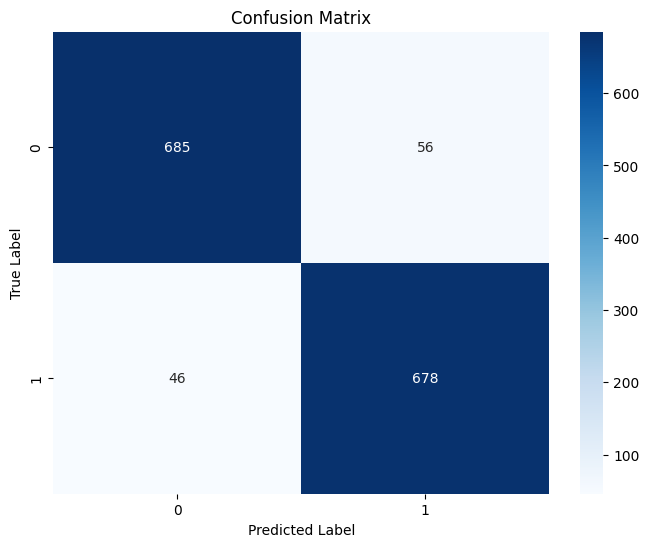

Recall: 93.6464%

Precision: 92.3706%

F1-Score: 0.9300

Accuracy: 93.04%

Precision (micro): 0.9304
Precision (macro): 0.9304
Precision (weighted): 0.9305

Recall (micro): 0.9304
Recall (macro): 0.9304
Recall (weighted): 0.9304

F1-Score (micro): 0.9304
F1-Score (macro): 0.9304
F1-Score (weighted): 0.9304

n_estimator = 50 : 



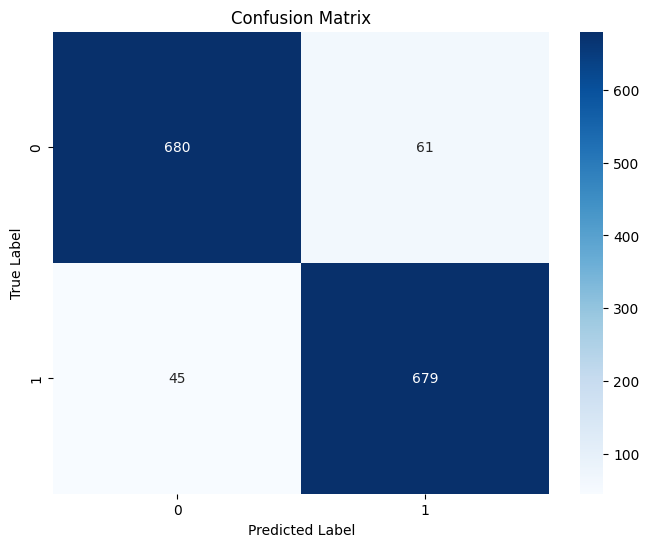

Recall: 93.7845%

Precision: 91.7568%

F1-Score: 0.9276

Accuracy: 92.76%

Precision (micro): 0.9276
Precision (macro): 0.9277
Precision (weighted): 0.9279

Recall (micro): 0.9276
Recall (macro): 0.9278
Recall (weighted): 0.9276

F1-Score (micro): 0.9276
F1-Score (macro): 0.9276
F1-Score (weighted): 0.9276

n_estimator = 100 : 



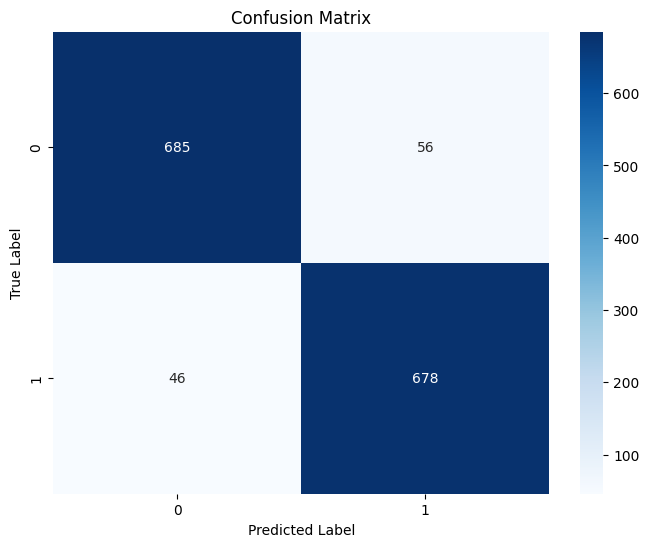

Recall: 93.6464%

Precision: 92.3706%

F1-Score: 0.9300

Accuracy: 93.04%

Precision (micro): 0.9304
Precision (macro): 0.9304
Precision (weighted): 0.9305

Recall (micro): 0.9304
Recall (macro): 0.9304
Recall (weighted): 0.9304

F1-Score (micro): 0.9304
F1-Score (macro): 0.9304
F1-Score (weighted): 0.9304

n_estimator = 200 : 



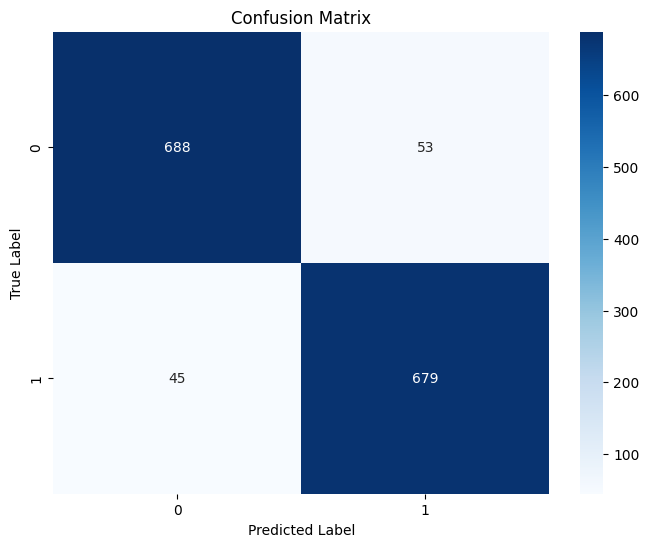

Recall: 93.7845%

Precision: 92.7596%

F1-Score: 0.9327

Accuracy: 93.31%

Precision (micro): 0.9331
Precision (macro): 0.9331
Precision (weighted): 0.9332

Recall (micro): 0.9331
Recall (macro): 0.9332
Recall (weighted): 0.9331

F1-Score (micro): 0.9331
F1-Score (macro): 0.9331
F1-Score (weighted): 0.9331



In [18]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train_normalized, y_train)
y_pred_AB = adaboost.predict(X_test_normalized)

    #TESTING
#CONFUSION MATRIX
cm_AB = confusion_matrix(y_test, y_pred_AB)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_AB, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#RECALL
recall_AB = recall_score(y_test, y_pred_AB)
print(f"Recall: {recall_AB * 100:.4f}%\n")

#PRECISION
precision_AB = precision_score(y_test, y_pred_AB)
print(f"Precision: {precision_AB * 100:.4f}%\n")

#F1-Score
f1_AB = f1_score(y_test, y_pred_AB)
print(f"F1-Score: {f1_AB:.4f}\n")

#ACCURACY
accuracy_AB = accuracy_score(y_test, y_pred_AB)
print(f"Accuracy: {accuracy_AB * 100:.2f}%\n")

precision_micro_AB = precision_score(y_test, y_pred_AB, average='micro')
precision_macro_AB = precision_score(y_test, y_pred_AB, average='macro')
precision_weighted_AB = precision_score(y_test, y_pred_AB, average='weighted')

recall_micro_AB = recall_score(y_test, y_pred_AB, average='micro')
recall_macro_AB = recall_score(y_test, y_pred_AB, average='macro')
recall_weighted_AB = recall_score(y_test, y_pred_AB, average='weighted')

f1_micro_AB = f1_score(y_test, y_pred_AB, average='micro')
f1_macro_AB = f1_score(y_test, y_pred_AB, average='macro')
f1_weighted_AB = f1_score(y_test, y_pred_AB, average='weighted')

print(f"Precision (micro): {precision_micro_AB:.4f}")
print(f"Precision (macro): {precision_macro_AB:.4f}")
print(f"Precision (weighted): {precision_weighted_AB:.4f}\n")

print(f"Recall (micro): {recall_micro_AB:.4f}")
print(f"Recall (macro): {recall_macro_AB:.4f}")
print(f"Recall (weighted): {recall_weighted_AB:.4f}\n")

print(f"F1-Score (micro): {f1_micro_AB:.4f}")
print(f"F1-Score (macro): {f1_macro_AB:.4f}")
print(f"F1-Score (weighted): {f1_weighted_AB:.4f}\n")

# Different n_estimators
n_estimators_list = [50, 100, 200]

for n_estimators in n_estimators_list:
    
    adaboost = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    adaboost.fit(X_train_normalized, y_train)
    y_pred_AB = adaboost.predict(X_test_normalized)
    print(f"n_estimator = {n_estimators} : \n")
    
        #TESTING
    #CONFUSION MATRIX
    cm_AB = confusion_matrix(y_test, y_pred_AB)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_AB, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    #RECALL
    recall_AB = recall_score(y_test, y_pred_AB)
    print(f"Recall: {recall_AB * 100:.4f}%\n")

    #PRECISION
    precision_AB = precision_score(y_test, y_pred_AB)
    print(f"Precision: {precision_AB * 100:.4f}%\n")

    #F1-Score
    f1_AB = f1_score(y_test, y_pred_AB)
    print(f"F1-Score: {f1_AB:.4f}\n")

    #ACCURACY
    accuracy_AB = accuracy_score(y_test, y_pred_AB)
    print(f"Accuracy: {accuracy_AB * 100:.2f}%\n")

    precision_micro_AB = precision_score(y_test, y_pred_AB, average='micro')
    precision_macro_AB = precision_score(y_test, y_pred_AB, average='macro')
    precision_weighted_AB = precision_score(y_test, y_pred_AB, average='weighted')

    recall_micro_AB = recall_score(y_test, y_pred_AB, average='micro')
    recall_macro_AB = recall_score(y_test, y_pred_AB, average='macro')
    recall_weighted_AB = recall_score(y_test, y_pred_AB, average='weighted')

    f1_micro_AB = f1_score(y_test, y_pred_AB, average='micro')
    f1_macro_AB = f1_score(y_test, y_pred_AB, average='macro')
    f1_weighted_AB = f1_score(y_test, y_pred_AB, average='weighted')

    print(f"Precision (micro): {precision_micro_AB:.4f}")
    print(f"Precision (macro): {precision_macro_AB:.4f}")
    print(f"Precision (weighted): {precision_weighted_AB:.4f}\n")

    print(f"Recall (micro): {recall_micro_AB:.4f}")
    print(f"Recall (macro): {recall_macro_AB:.4f}")
    print(f"Recall (weighted): {recall_weighted_AB:.4f}\n")

    print(f"F1-Score (micro): {f1_micro_AB:.4f}")
    print(f"F1-Score (macro): {f1_macro_AB:.4f}")
    print(f"F1-Score (weighted): {f1_weighted_AB:.4f}\n")

#### ⚡️ XGBoost

Fitting 3 folds for each of 324 candidates, totalling 972 fits


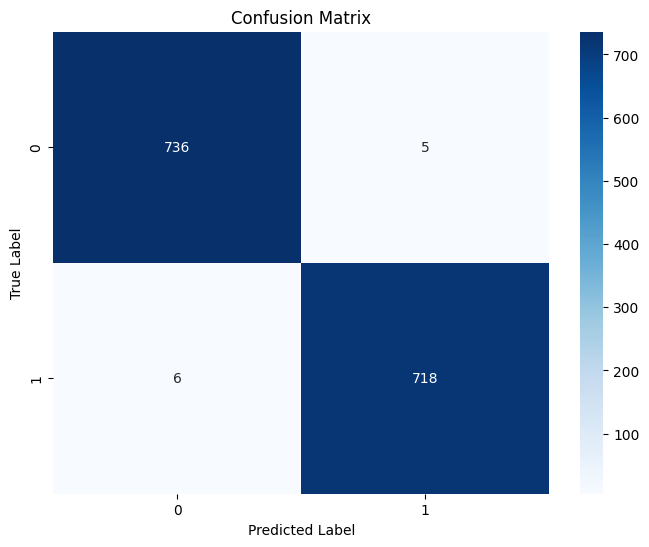

Recall: 99.1713%

Precision: 99.3084%

F1-Score: 0.9924

Accuracy: 99.25%

Precision (micro): 0.9925
Precision (macro): 0.9925
Precision (weighted): 0.9925

Recall (micro): 0.9925
Recall (macro): 0.9925
Recall (weighted): 0.9925

F1-Score (micro): 0.9925
F1-Score (macro): 0.9925
F1-Score (weighted): 0.9925



In [19]:
gb_model = GradientBoostingClassifier(random_state=42)

#hyperparameters grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5],  # XGBoost's min_child_weight equivalent
    'subsample': [0.8, 0.9, 1.0],
    'max_features': [0.8, 0.9,  1.0]  # Equivalent to colsample_bytree in XGBoost
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3,
                           n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train_normalized, y_train)
best_gb_model = grid_search.best_estimator_
best_params = grid_search.best_params_
y_pred_XGB = best_gb_model.predict(X_test_normalized)


    #TESTING
#CONFUSION MATRIX
cm_XGB = confusion_matrix(y_test, y_pred_XGB)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_XGB, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#RECALL
recall_XGB = recall_score(y_test, y_pred_XGB)
print(f"Recall: {recall_XGB * 100:.4f}%\n")

#PRECISION
precision_XGB = precision_score(y_test, y_pred_XGB)
print(f"Precision: {precision_XGB * 100:.4f}%\n")

#F1-Score
f1_XGB = f1_score(y_test, y_pred_XGB)
print(f"F1-Score: {f1_XGB:.4f}\n")

#ACCURACY
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
print(f"Accuracy: {accuracy_XGB * 100:.2f}%\n")

precision_micro_XGB = precision_score(y_test, y_pred_XGB, average='micro')
precision_macro_XGB = precision_score(y_test, y_pred_XGB, average='macro')
precision_weighted_XGB = precision_score(y_test, y_pred_XGB, average='weighted')

recall_micro_XGB = recall_score(y_test, y_pred_XGB, average='micro')
recall_macro_XGB = recall_score(y_test, y_pred_XGB, average='macro')
recall_weighted_XGB = recall_score(y_test, y_pred_XGB, average='weighted')

f1_micro_XGB = f1_score(y_test, y_pred_XGB, average='micro')
f1_macro_XGB = f1_score(y_test, y_pred_XGB, average='macro')
f1_weighted_XGB = f1_score(y_test, y_pred_XGB, average='weighted')

print(f"Precision (micro): {precision_micro_XGB:.4f}")
print(f"Precision (macro): {precision_macro_XGB:.4f}")
print(f"Precision (weighted): {precision_weighted_XGB:.4f}\n")

print(f"Recall (micro): {recall_micro_XGB:.4f}")
print(f"Recall (macro): {recall_macro_XGB:.4f}")
print(f"Recall (weighted): {recall_weighted_XGB:.4f}\n")

print(f"F1-Score (micro): {f1_micro_XGB:.4f}")
print(f"F1-Score (macro): {f1_macro_XGB:.4f}")
print(f"F1-Score (weighted): {f1_weighted_XGB:.4f}\n")


### 🛠 From Scratch  
In this subsection, you should implement the SAMME algorithm for adaptive boosting from scratch.Then you should deploy this boosting model and a base estimator, which is Gaussian Naive Bayes here, to classify hotels.

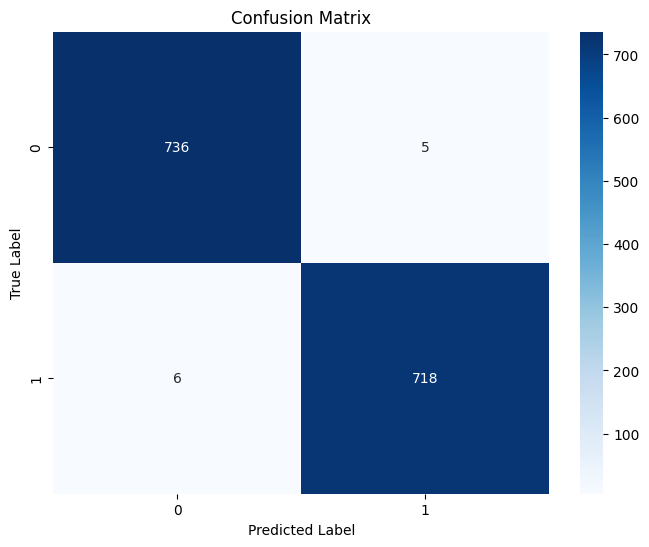

Recall: 99.1713%

Precision: 99.3084%

F1-Score: 0.9924

Accuracy: 99.25%

Precision (micro): 0.9925
Precision (macro): 0.9925
Precision (weighted): 0.9925

Recall (micro): 0.9925
Recall (macro): 0.9925
Recall (weighted): 0.9925

F1-Score (micro): 0.9925
F1-Score (macro): 0.9925
F1-Score (weighted): 0.9925



In [20]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.naive_bayes import GaussianNB
import numpy as np
class SimpleMultiClassBoosting(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=GaussianNB, n_estimators=50):
        self.base_estimator = base_estimator if base_estimator is not None else GaussianNB()
        self.n_estimators = n_estimators
        self.learners = []
        self.learner_weights = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.weights = (1/n_samples) * np.ones(n_samples, dtype=float) # initialize weights uniformly
        for _ in range(self.n_estimators):
            learner = GaussianNB() # instanciate model
            learner.fit(X, y, sample_weight=self.weights) # fit to samples, using weights
            pred = learner.predict(X) # predict the batch
            missClassified = pred != y # get index of misclassified samples
            # TODO : compute learner error rate according to SAMME algorithm
            err = np.sum(self.weights * missClassified) / np.sum(self.weights)
            
            
            # TODO : compute learner weight using SAMME algorithm
            learner_weight = np.log((1 - err) / err) + np.log(2 - 1)
            
            # TODO : a classifier with error rate which is worse than random should be dropped
            if err >= 1 - (1 / 2):
                continue
            # hint : error rate of untrained classifier : 1 - (1 / n_classes)

            # TODO : increase the weights of misclassified samples according to SAMME algorithm    
            self.weights[missClassified] *= np.exp(learner_weight)  # Increase weight for misclassified samples
            
            self.weights /= np.sum(self.weights) # renormalize weights to make them sum up to 1  
            self.learners.append(learner)
            # TODO : store learner weight in self.learner_weights
            self.learner_weights.append(learner_weight)

    def predict(self, X):
        # note that X can contain multiple samples in shape of array, in which, each row corresponds to a query
        predictionsOfLearners = []
        for learner in self.learners:
            predictionsOfLearners.append(learner.predict(X)) # collect predictions from each learner
        # TODO : weighted vote for each sample's prediction across all learners, each learner's weight is stored in self.learner_weights
        weighted_votes = np.zeros((X.shape[0], len(np.unique(predictionsOfLearners))))  # Initialize a vote matrix for each class

        for i, learner_weight in enumerate(self.learner_weights):
            # For each learner's predictions, add the learner's weight to the corresponding class vote
            for idx, pred in enumerate(predictionsOfLearners[:, i]):
                weighted_votes[idx, pred] += learner_weight
        # TODO : make final prediction by considering the label which has highest weighted vote
        final_predictions = np.argmax(weighted_votes, axis=1)  # For each sample, select the class with the highest weighted vote

        return final_predictions
        
        
        
scratch = SimpleMultiClassBoosting()

scratch.fit(X_train_normalized, y_train)

y_pred_scr = best_gb_model.predict(X_test_normalized)

    #TESTING
#CONFUSION MATRIX
cm_scr = confusion_matrix(y_test, y_pred_scr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_scr, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#RECALL
recall_scr = recall_score(y_test, y_pred_scr)
print(f"Recall: {recall_scr * 100:.4f}%\n")

#PRECISION
precision_scr = precision_score(y_test, y_pred_scr)
print(f"Precision: {precision_scr * 100:.4f}%\n")

#F1-Score
f1_scr = f1_score(y_test, y_pred_scr)
print(f"F1-Score: {f1_scr:.4f}\n")

#ACCURACY
accuracy_scr = accuracy_score(y_test, y_pred_scr)
print(f"Accuracy: {accuracy_scr * 100:.2f}%\n")

precision_micro_scr = precision_score(y_test, y_pred_scr, average='micro')
precision_macro_scr = precision_score(y_test, y_pred_scr, average='macro')
precision_weighted_scr = precision_score(y_test, y_pred_scr, average='weighted')

recall_micro_scr = recall_score(y_test, y_pred_scr, average='micro')
recall_macro_scr = recall_score(y_test, y_pred_scr, average='macro')
recall_weighted_scr = recall_score(y_test, y_pred_scr, average='weighted')

f1_micro_scr = f1_score(y_test, y_pred_scr, average='micro')
f1_macro_scr = f1_score(y_test, y_pred_scr, average='macro')
f1_weighted_scr = f1_score(y_test, y_pred_scr, average='weighted')

print(f"Precision (micro): {precision_micro_scr:.4f}")
print(f"Precision (macro): {precision_macro_scr:.4f}")
print(f"Precision (weighted): {precision_weighted_scr:.4f}\n")

print(f"Recall (micro): {recall_micro_scr:.4f}")
print(f"Recall (macro): {recall_macro_scr:.4f}")
print(f"Recall (weighted): {recall_weighted_scr:.4f}\n")

print(f"F1-Score (micro): {f1_micro_scr:.4f}")
print(f"F1-Score (macro): {f1_macro_scr:.4f}")
print(f"F1-Score (weighted): {f1_weighted_scr:.4f}\n")